#**Plant Disease Detection**


---
This project aims to detect plant diseases using images of plant leaves. We will be using the [PlantVillage dataset](https://www.kaggle.com/datasets), which consists of images labeled with different plant diseases and healthy leaves. The goal is to build a deep learning model that classifies the images into disease categories.

### **Dataset Overview:**
- Total images: 54,304
- Classes: 38 plant disease categories
- Image type: RGB leaf images
### **Tools Used:**
- **Libraries**: TensorFlow, Keras, Matplotlib, NumPy, OpenCV
###**Models**:
* Convolutional Neural Network (CNN)
* Support Vector Machine
* Random Forest






### Data Loading and Exploration
---

In [17]:
# Mounting Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [18]:
#Unzipping File to extract data
import zipfile
zip_path = '/content/drive/MyDrive/ML_Project/plantvillage.zip'  # Saving File to a Different Path
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall('/content/plantvillage')

In [19]:
!unzip /content/drive/MyDrive/ML_Project//plantvillage.zip -d /content/     #Unziping File

Streaming output truncated to the last 5000 lines.
  inflating: /content/PlantVillage/val/Soybean___healthy/52c7d07b-561b-4380-801a-3824e65a5135___RS_HL 3797.JPG  
  inflating: /content/PlantVillage/val/Soybean___healthy/53168d1c-ac90-4039-9eff-7479475a6b74___RS_HL 6355.JPG  
  inflating: /content/PlantVillage/val/Soybean___healthy/5344b09f-bbbe-4a2c-9345-d93dd4e69eb4___RS_HL 4693.JPG  
  inflating: /content/PlantVillage/val/Soybean___healthy/5361ba4a-351e-466c-99c5-8845f35c00df___RS_HL 2890.JPG  
  inflating: /content/PlantVillage/val/Soybean___healthy/537e5409-d824-4859-967f-3c502f13deec___RS_HL 5474.JPG  
  inflating: /content/PlantVillage/val/Soybean___healthy/538969da-545b-4bce-bc1d-0932898dc5e6___RS_HL 5230.JPG  
  inflating: /content/PlantVillage/val/Soybean___healthy/538ccfe2-1509-40d7-beae-ae7cf84e1e5d___RS_HL 3717.JPG  
  inflating: /content/PlantVillage/val/Soybean___healthy/5397bf6a-aeeb-4f1c-b554-bdb604bb23c3___RS_HL 6508.JPG  
  inflating: /content/PlantVillage/val/Soybea

In [24]:
#Analyzing Data
import os
import glob
import pandas as pd

data_dir = '/content/PlantVillage'

image_paths = glob.glob(os.path.join(data_dir, '**', '*.JPG'), recursive=True)
image_paths += glob.glob(os.path.join(data_dir, '**', '*.jpg'), recursive=True)
image_paths += glob.glob(os.path.join(data_dir, '**', '*.png'), recursive=True)
print ("Number of Images: ",len(image_paths))


Number of Images:  54304


In [11]:
#Extracting Data
import pandas as pd
import os

def extract_label(PlantVillage):
    # label is the folder name (last directory before the filename)
    return os.path.basename(os.path.dirname(PlantVillage))

df = pd.DataFrame({
    "path": image_paths,
})

df["label"] = df["path"].apply(extract_label)

df.head()

,path,label
0,/content/PlantVillage/val/Grape___Black_rot/40...,Grape___Black_rot
1,/content/PlantVillage/val/Grape___Black_rot/4c...,Grape___Black_rot
2,/content/PlantVillage/val/Grape___Black_rot/de...,Grape___Black_rot
3,/content/PlantVillage/val/Grape___Black_rot/1f...,Grape___Black_rot
4,/content/PlantVillage/val/Grape___Black_rot/a1...,Grape___Black_rot


### **Data Processing**

We begin by splitting the dataset into three parts: **Training**, **Validation**, and **Test** sets. This ensures that the model is evaluated on unseen data, providing a more accurate measure of its generalization ability.

Next, we resize the images to smaller dimensions. Classical machine learning models such as **SVM** and **Random Forest** tend to perform better with smaller images, as they reduce the computational complexity and make the learning process more efficient.

To further enhance the performance of our classical models, we apply **Principal Component Analysis (PCA)**. PCA helps in reducing the number of features (parameters) by transforming the data into a set of orthogonal components. This reduction leads to more efficient training, mitigating the risk of overfitting and speeding up the learning process.



In [ ]:
#Processing Data
from sklearn.model_selection import train_test_split

# Train/Test split (80/20)
train_df, test_df = train_test_split(
    df,
    test_size=0.2,
    stratify=df["label"],
    random_state=42
)

# Train/Validation split (20% of train)
train_df, val_df = train_test_split(
    train_df,
    test_size=0.2,
    stratify=train_df["label"],
    random_state=42
)

len(train_df), len(val_df), len(test_df)


(34754, 8689, 10861)

In [ ]:
import numpy as np
from PIL import Image
from tqdm import tqdm

IMG_SIZE = 64  # classical ML runs better with small images

def load_images(df):
    X = []
    y = df["label"].values
    for path in tqdm(df["path"].values):
        img = Image.open(path).convert("RGB")
        img = img.resize((IMG_SIZE, IMG_SIZE))
        arr = np.array(img) / 255.0   # normalize
        X.append(arr.flatten())       # flatten 64×64×3 -> 12288 features
    return np.array(X), y

X_train_raw, y_train = load_images(train_df)
X_val_raw,   y_val   = load_images(val_df)
X_test_raw,  y_test  = load_images(test_df)

X_train_raw.shape


100%|██████████| 10861/10861 [00:25<00:00, 432.25it/s]


(34754, 12288)

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=20, random_state=42)

X_train = pca.fit_transform(X_train_raw)
X_val   = pca.transform(X_val_raw)
X_test  = pca.transform(X_test_raw)

X_train.shape, X_val.shape, X_test.shape


((34754, 20), (8689, 20), (10861, 20))

In [ ]:
import numpy as np
np.save('/content/drive/MyDrive/X_train_raw.npy',X_train_raw)
np.save('/content/drive/MyDrive/X_val_raw.npy',X_val_raw)
np.save('/content/drive/MyDrive/X_test_raw.npy',X_test_raw)

In [ ]:
import numpy as np

np.save('/content/drive/MyDrive/X_train.npy', X_train)
np.save('/content/drive/MyDrive/X_val.npy', X_val)
np.save('/content/drive/MyDrive/X_test.npy', X_test)
np.save('/content/drive/MyDrive/y_train.npy', y_train)
np.save('/content/drive/MyDrive/y_val.npy', y_val)
np.save('/content/drive/MyDrive/y_test.npy', y_test)


In [35]:
#Loading Data
import numpy as np
X_train = np.load('/content/drive/MyDrive/X_train.npy', allow_pickle=True)
X_val   = np.load('/content/drive/MyDrive/X_val.npy', allow_pickle=True)
X_test  = np.load('/content/drive/MyDrive/X_test.npy', allow_pickle=True)

y_train = np.load('/content/drive/MyDrive/y_train.npy', allow_pickle=True)
y_val   = np.load('/content/drive/MyDrive/y_val.npy', allow_pickle=True)
y_test  = np.load('/content/drive/MyDrive/y_test.npy', allow_pickle=True)



In [36]:
import numpy as np
X_train_raw = np.load('/content/drive/MyDrive/X_train_raw.npy', allow_pickle=True)
X_val_raw   = np.load('/content/drive/MyDrive/X_val_raw.npy', allow_pickle=True)
X_test_raw  = np.load('/content/drive/MyDrive/X_test_raw.npy', allow_pickle=True)

### **Support Vector Machine (SVM) with Hyperparameter Tuning**

In this section, we implement a **Support Vector Machine (SVM)** classifier to classify the data. The SVM is a powerful supervised learning model that performs classification by finding the optimal hyperplane that separates the classes in a high-dimensional feature space.

To ensure optimal performance, we use **Grid Search Cross-Validation** (`GridSearchCV`) to tune the hyperparameters of the SVM. The parameters we optimize are:
- **C**: Regularization parameter that controls the trade-off between achieving a low error on the training data and minimizing the model complexity.
- **gamma**: Defines the influence of a single training example, with smaller values indicating broader influence and larger values having a more local impact.
- **kernel**: The type of kernel function used in the SVM model, and we use the **RBF (Radial Basis Function)** kernel, which is widely used for non-linear classification problems.

The grid search process performs **k-fold cross-validation** (with **k=3**) on the hyperparameter space, searching for the combination that gives the highest accuracy on the training set.

The best combination of parameters will be printed, along with the corresponding cross-validation accuracy achieved during training.


In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

param_grid_svm = {
    'C': [1, 5, 10],
    'gamma': ['scale', 0.01, 0.001],
    'kernel': ['rbf']
}

svm = SVC()

grid_svm = GridSearchCV(
    svm,
    param_grid_svm,
    cv=3,
    scoring='accuracy',
    n_jobs=-1,
    verbose=2
)

grid_svm.fit(X_train, y_train)

print("Best SVM parameters:", grid_svm.best_params_)
print("Best SVM training CV accuracy:", grid_svm.best_score_)


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

svm_best = grid_svm.best_estimator_

y_val_pred_svm  = svm_best.predict(X_val)
y_test_pred_svm = svm_best.predict(X_test)

print("SVM Validation Report:")
print(classification_report(y_val, y_val_pred_svm))

print("SVM Test Report:")
print(classification_report(y_test, y_test_pred_svm))


SVM Validation Report:
                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.68      0.57      0.62       101
                                 Apple___Black_rot       0.88      0.87      0.87        99
                          Apple___Cedar_apple_rust       0.72      0.41      0.52        44
                                   Apple___healthy       0.79      0.90      0.84       263
                               Blueberry___healthy       0.89      0.93      0.91       240
          Cherry_(including_sour)___Powdery_mildew       0.83      0.83      0.83       168
                 Cherry_(including_sour)___healthy       0.88      0.91      0.90       137
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.61      0.52      0.56        82
                       Corn_(maize)___Common_rust_       0.98      0.98      0.98       191
               Corn_(maize)___Northern_Leaf_Blight      

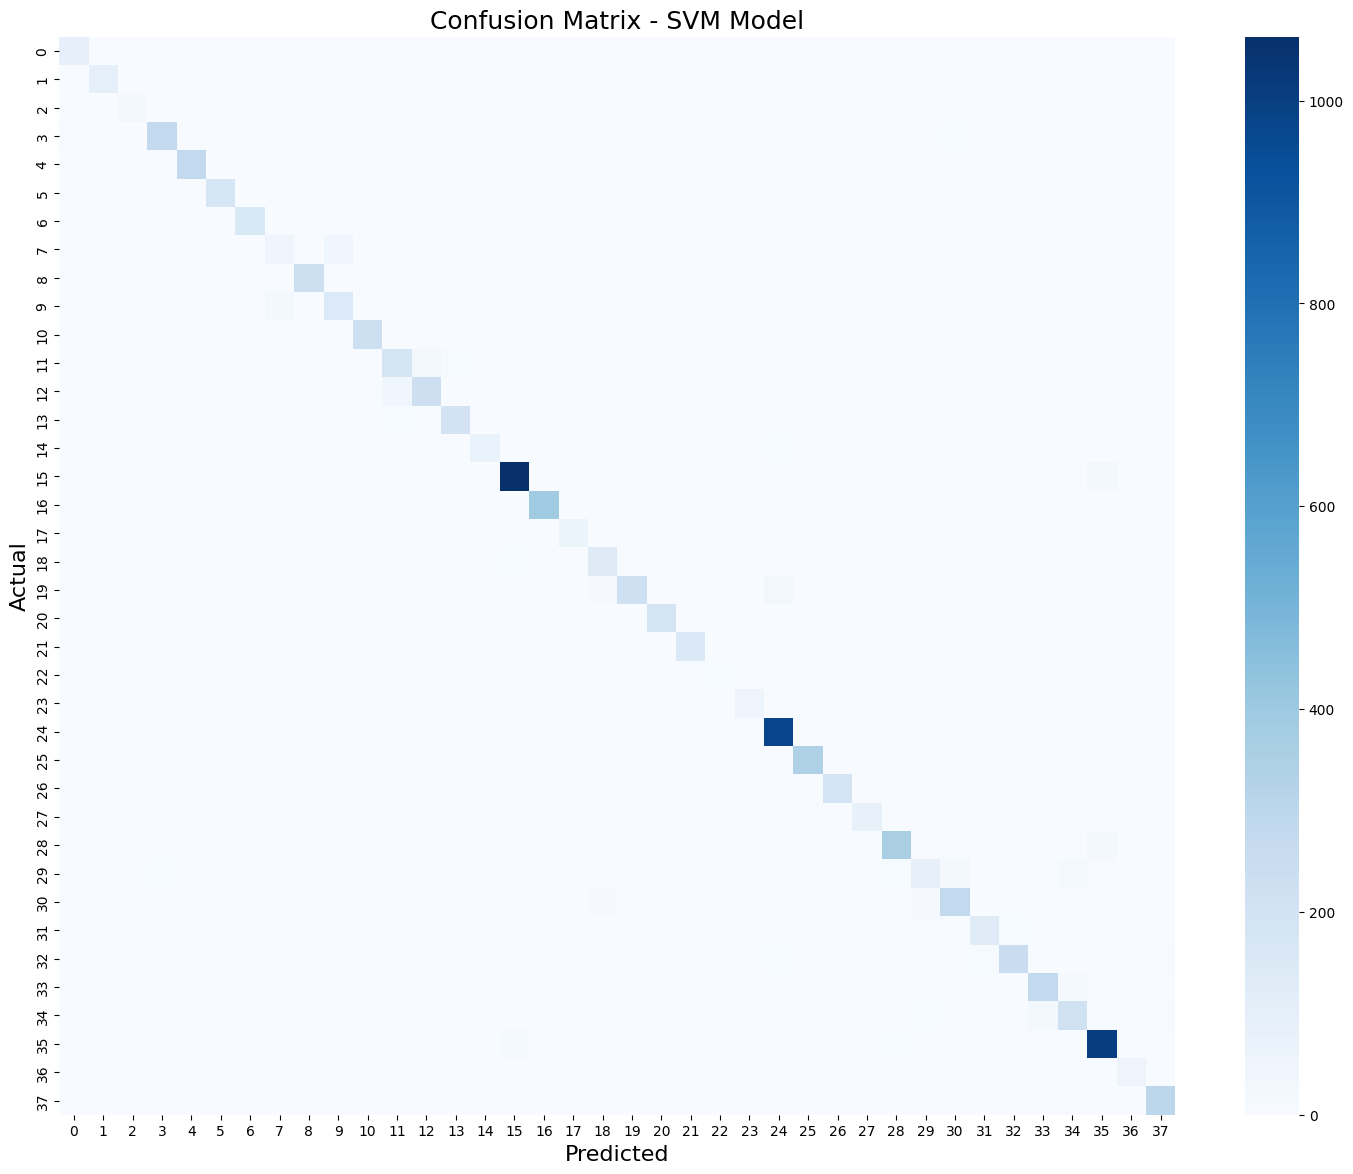


Classification Report:
                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.69      0.70      0.70       126
                                 Apple___Black_rot       0.87      0.77      0.82       124
                          Apple___Cedar_apple_rust       0.76      0.51      0.61        55
                                   Apple___healthy       0.82      0.85      0.84       329
                               Blueberry___healthy       0.87      0.94      0.90       300
          Cherry_(including_sour)___Powdery_mildew       0.84      0.85      0.85       210
                 Cherry_(including_sour)___healthy       0.86      0.94      0.90       171
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.57      0.49      0.53       103
                       Corn_(maize)___Common_rust_       0.96      0.99      0.98       238
               Corn_(maize)___Northern_Leaf_Blight     

In [ ]:
y_pred = svm.predict(X_test)

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# Confusion Matrix
cm_svm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(18, 14))
sns.heatmap(cm_svm, cmap="Blues", annot=False)
plt.xlabel("Predicted", fontsize=16)
plt.ylabel("Actual", fontsize=16)
plt.title("Confusion Matrix - SVM Model", fontsize=18)
plt.show()

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))


In [ ]:
import joblib
joblib.dump(svm_best, '/content/drive/MyDrive/svm_model.pkl')
joblib.dump(pca, '/content/drive/MyDrive/pca_model.pkl')

['/content/drive/MyDrive/pca_model.pkl']

In [2]:
#Loading Model and PCA
import joblib
svm = joblib.load('/content/drive/MyDrive/svm_model.pkl')
pca = joblib.load('/content/drive/MyDrive/pca_model.pkl')

### **SVM Model Performance**

The **SVM model** has achieved an **accuracy of 85.4%**, which is quite impressive for this multi-class classification problem involving different plant diseases.

- **Macro Average**: The **macro average** F1 score of **0.81** indicates that the model performs reasonably well across all classes, with no class significantly outperforming others. The **precision** and **recall** are balanced, showing the model's ability to classify both positive and negative samples efficiently.

- **Weighted Average**: The **weighted average** F1 score of **0.85** reflects the model’s strong performance, taking into account the class imbalances by giving more weight to classes with more instances.

- **Class-specific Performance**:
  - The model performs exceptionally well for certain classes such as **Tomato___Tomato_Yellow_Leaf_Curl_Virus** with a high precision and recall of **0.91** and **0.94**, respectively.
  - Some classes like **Potato___healthy** show lower performance metrics (**precision: 0.67**, **recall: 0.33**), suggesting that the model struggles with those classes.

- **Confusion Matrix**: The confusion matrix shows that the model is generally predicting correctly with most of the values concentrated along the diagonal. However, there are a few misclassifications, which are expected in complex multi-class problems like this one.

#### **Key Takeaways**:
1. **High Accuracy**: The model performs well overall, but some classes still present challenges.
2. **Imbalanced Classes**: Some classes with fewer samples may have contributed to lower performance in terms of recall.
3. **Further Improvements**: We can explore techniques like **class weighting**, **data augmentation**, or **more advanced models** like **Random Forest** or **CNNs** for further improvement.

This analysis shows that while the SVM model is effective, further tuning or trying other models might improve performance, especially for harder-to-predict classes.


### **Random Forest Model**

In this section, we implement a **Random Forest Classifier**. Random Forest is an ensemble learning method that operates by constructing a multitude of decision trees during training and outputting the class that is the mode of the classes (classification) or mean prediction (regression) of the individual trees. It is known for its ability to handle large datasets with higher dimensionality and its robustness to overfitting.

For this model, we've configured it with the following parameters:
- **n_estimators**: The number of trees in the forest. We are using **200** trees.
- **max_depth**: The maximum depth of the tree. Set to `None`, meaning nodes are expanded until all leaves are pure or until all leaves contain less than `min_samples_split` samples.
- **min_samples_split**: The minimum number of samples required to split an internal node. We are using **5** samples.

We will train the Random Forest model and then evaluate its performance using a confusion matrix and classification report.

Training Random Forest... (This might take a moment)
Random Forest Accuracy: 67.33%


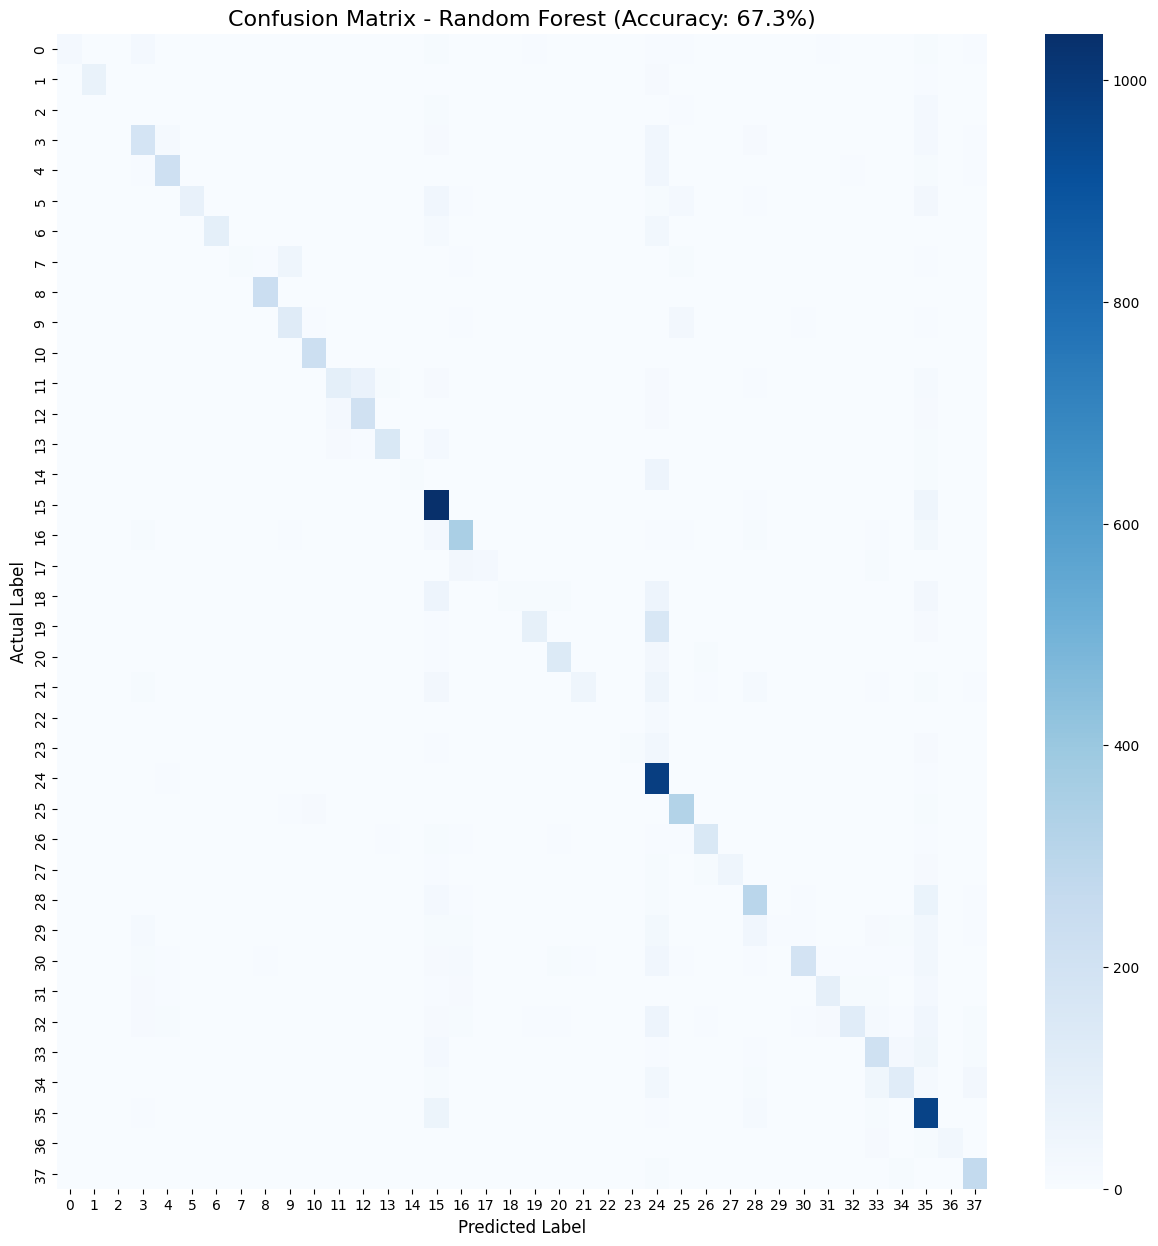

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

# 1. Initialize the Random Forest Classifier
# n_estimators=100 means we create 100 decision trees
rf_model = RandomForestClassifier(n_estimators=200,max_depth = None, random_state=42,min_samples_split=5,n_jobs=-1)

print("Training Random Forest... (This might take a moment)")
# 2. Train the model
rf_model.fit(X_train, y_train)

# 3. Make Predictions
y_pred_rf = rf_model.predict(X_test)

# 4. Check Accuracy
acc = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {acc * 100:.2f}%")

# 5. Plot the Confusion Matrix
cm = confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize=(15, 15))
sns.heatmap(cm, annot=False, fmt='d', cmap='Blues') # annot=False to keep it clean like your previous one
plt.title(f'Confusion Matrix - Random Forest (Accuracy: {acc*100:.1f}%)', fontsize=16)
plt.ylabel('Actual Label', fontsize=12)
plt.xlabel('Predicted Label', fontsize=12)
plt.show()

In [28]:
y_pred_rf = rf_model.predict(X_test)

In [30]:
from sklearn.metrics import classification_report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf))


Classification Report:


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.79      0.18      0.30       126
                                 Apple___Black_rot       0.88      0.61      0.72       124
                          Apple___Cedar_apple_rust       0.00      0.00      0.00        55
                                   Apple___healthy       0.59      0.57      0.58       329
                               Blueberry___healthy       0.76      0.72      0.74       300
          Cherry_(including_sour)___Powdery_mildew       0.91      0.38      0.53       210
                 Cherry_(including_sour)___healthy       0.88      0.59      0.71       171
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.65      0.11      0.18       103
                       Corn_(maize)___Common_rust_       0.91      0.99      0.95       238
               Corn_(maize)___Northern_Leaf_Blight       0.65      0.65      0.

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [25]:
import joblib
rf_model = joblib.load('/content/drive/MyDrive/rf_model.pkl')

In [ ]:
import joblib
joblib.dump(rf_model, '/content/drive/MyDrive/rf_model.pkl')

['/content/drive/MyDrive/rf_model.pkl']

### **Random Forest Model Performance**

The **Random Forest model** achieved an **accuracy of 67.33%** on the test set. This is lower than the SVM model's accuracy of 85.4%.

- **Macro Average**: The **macro average** F1 score is **0.55**, indicating that the model's performance varies significantly across different classes. Both precision and recall are relatively low for many classes, suggesting a challenge in correctly identifying all classes uniformly.

- **Weighted Average**: The **weighted average** F1 score of **0.64** reflects the model's overall performance, taking into account class imbalances. While slightly better than the macro average, it still points to moderate performance.

- **Class-specific Performance**:
    - The model performs well for classes like **Corn_(maize)___Common_rust_** (precision: 0.91, recall: 0.99) and **Orange___Haunglongbing_(Citrus_greening)** (precision: 0.70, recall: 0.95), showing high recall for some dominant classes.
    - However, it struggles significantly with several classes, achieving a precision and recall of **0.00** for **Apple___Cedar_apple_rust** and **Potato___healthy**. This indicates that the model completely failed to predict these classes.
    - Many other classes also show very low precision or recall, such as **Tomato___Early_blight** (precision: 0.64, recall: 0.04) and **Raspberry___healthy** (precision: 1.00, recall: 0.12).

#### **Key Takeaways**:
1. **Moderate Accuracy**: The Random Forest model's accuracy is considerably lower than the SVM model, suggesting it might not be as suitable for this dataset with the current preprocessing and hyperparameter settings.
2. **Poor Class Generalization**: The low macro average and the very poor performance on certain classes highlight a significant issue with the model's ability to generalize across all plant diseases.
3. **Further Optimization Needed**: Extensive hyperparameter tuning or feature engineering would be necessary to improve the performance of the Random Forest model to a comparable level with the SVM or CNN model. The current parameters (`n_estimators=200, max_depth=None, min_samples_split=5`) might not be optimal for this specific problem.

This analysis suggests that the Random Forest model, in its current configuration, is not performing as effectively as the SVM model, especially for rarer or harder-to-distinguish classes. The Convolutional Neural Network (CNN) is typically much better suited for image classification tasks.

### **Convolutional Neural Network (CNN)**

In this section, we implement a **Convolutional Neural Network (CNN)**, which is particularly well-suited for image classification tasks. CNNs automatically learn spatial hierarchies of features from images through convolutional layers, pooling layers, and fully connected layers.

Our CNN model is designed to process the plant leaf images and classify them into different disease categories. It includes several convolutional layers for feature extraction, followed by max-pooling layers to reduce dimensionality and increase translation invariance. Finally, fully connected layers are used for classification.

We will train this CNN model and then evaluate its performance using various metrics to determine its effectiveness in accurately detecting plant diseases.

### **Data Management in CNN Setup**

This cell handles crucial data management steps to prepare the image dataset for CNN training:

1.  **Memory Cleaning**: Before loading the image dataset for the CNN, the cell explicitly deletes large NumPy arrays (`X_train_raw`, `X_val_raw`, `X_test_raw`, `X_train`, `X_val`, `X_test`) and calls `gc.collect()`. This is essential to free up significant RAM, preventing memory issues when dealing with the much larger image data required for the CNN.

2.  **Dataset Loading**: The `tf.keras.preprocessing.image_dataset_from_directory` function is used to efficiently load images from the `/content/PlantVillage/train` directory. It automatically infers class labels from subfolder names and resizes images to `128x128` pixels, grouping them into batches of 32.

3.  **Class Name Detection**: The `class_names` are extracted from the loaded dataset, providing a list of all 38 plant disease categories that the model will classify.

4.  **Data Partitioning**: A custom function, `get_dataset_partitions_tf`, splits the loaded dataset into training (80%), validation (10%), and testing (10%) subsets. This ensures that the model is trained, tuned, and evaluated on distinct data portions, simulating real-world performance.

5.  **Data Prefetching**: Finally, `.prefetch(buffer_size=tf.data.AUTOTUNE)` is applied to the training, validation, and test datasets. This optimizes the data pipeline by allowing the pre-processing and loading of the next batch of data to happen in parallel with the model training on the current batch, significantly improving training efficiency and preventing I/O bottlenecks.

In [20]:
import tensorflow as tf
from tensorflow import keras
from keras import layers, models
import os
import gc

print("Cleaning memory...")
vars_to_delete = ['X_train_raw', 'X_val_raw', 'X_test_raw', 'X_train', 'X_val', 'X_test']
for v in vars_to_delete:
    if v in globals():
        del globals()[v]
gc.collect()


BATCH_SIZE = 32
IMAGE_SIZE = 128
CHANNELS = 3
EPOCHS = 20

dataset_path = "/content/PlantVillage/train"

print("Loading data...")
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    dataset_path,
    shuffle=True,
    image_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE,
    label_mode='int'
)

class_names = dataset.class_names
print(f"Detected Classes ({len(class_names)}): {class_names}")

# Split Data: 80% Train, 10% Validation, 10% Test
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=1000):

    ds_size = len(ds)
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)
    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)

    train_ds = ds.take(train_size)
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size + val_size)
    return train_ds, val_ds, test_ds

train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

train_ds = train_ds.prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.prefetch(buffer_size=tf.data.AUTOTUNE)

Cleaning memory...
Loading data...
Found 43444 files belonging to 38 classes.
Detected Classes (38): ['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Cherry_(including_sour)___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Raspberry___healthy', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold'

In [1]:
import tensorflow as tf
from tensorflow import keras
from keras import layers, models
import os
import gc

print("Cleaning memory...")
vars_to_delete = ['X_train_raw', 'X_val_raw', 'X_test_raw', 'X_train', 'X_val', 'X_test']
for v in vars_to_delete:
    if v in globals():
        del globals()[v]
gc.collect()


BATCH_SIZE = 32
IMAGE_SIZE = 128
CHANNELS = 3
EPOCHS = 20

dataset_path = "/content/PlantVillage/train"

print("Loading data...")
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    dataset_path,
    shuffle=True,
    image_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE,
    label_mode='int'
)

class_names = dataset.class_names
print(f"Detected Classes ({len(class_names)}): {class_names}")

# Split Data: 80% Train, 10% Validation, 10% Test
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=1000):

    ds_size = len(ds)
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)
    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)

    train_ds = ds.take(train_size)
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    return train_ds, val_ds, test_ds

train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)


train_ds = train_ds.prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.prefetch(buffer_size=tf.data.AUTOTUNE)

#--Building CNN Model
print("Building Model...")
model = models.Sequential([

    layers.Input(shape=(IMAGE_SIZE, IMAGE_SIZE, CHANNELS)),
    layers.Rescaling(1./255),

    layers.Conv2D(32, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64,  kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64,  kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(len(class_names), activation='softmax')
])

model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

#--Training the model
print("Starting Training...")
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=EPOCHS,
    verbose=1
)


print("Evaluating on Test Set...")
scores = model.evaluate(test_ds)
print(f"Final Neural Network Accuracy: {scores[1]*100:.2f}%")

Cleaning memory...
Loading data...
Found 43444 files belonging to 38 classes.
Detected Classes (38): ['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Cherry_(including_sour)___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Raspberry___healthy', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold'

In [1]:
import tensorflow as tf
from tensorflow import keras
from keras import models
import pandas as pd

model_path = '/content/drive/MyDrive/plant_disease_cnn_model.keras'
reloaded_model = models.load_model(model_path)
print("CNN Model loaded successfully!")

history_path = '/content/drive/MyDrive/cnn_training_history.csv'
reloaded_history = pd.read_csv(history_path)
print("Training history loaded successfully!")

reloaded_history.head()

CNN Model loaded successfully!
Training history loaded successfully!


,accuracy,loss,val_accuracy,val_loss
0,0.526186,1.709372,0.738394,0.861825
1,0.779351,0.709167,0.829861,0.521869
2,0.852389,0.461492,0.874537,0.406498
3,0.886701,0.351584,0.912953,0.276923
4,0.905987,0.287478,0.917593,0.238478


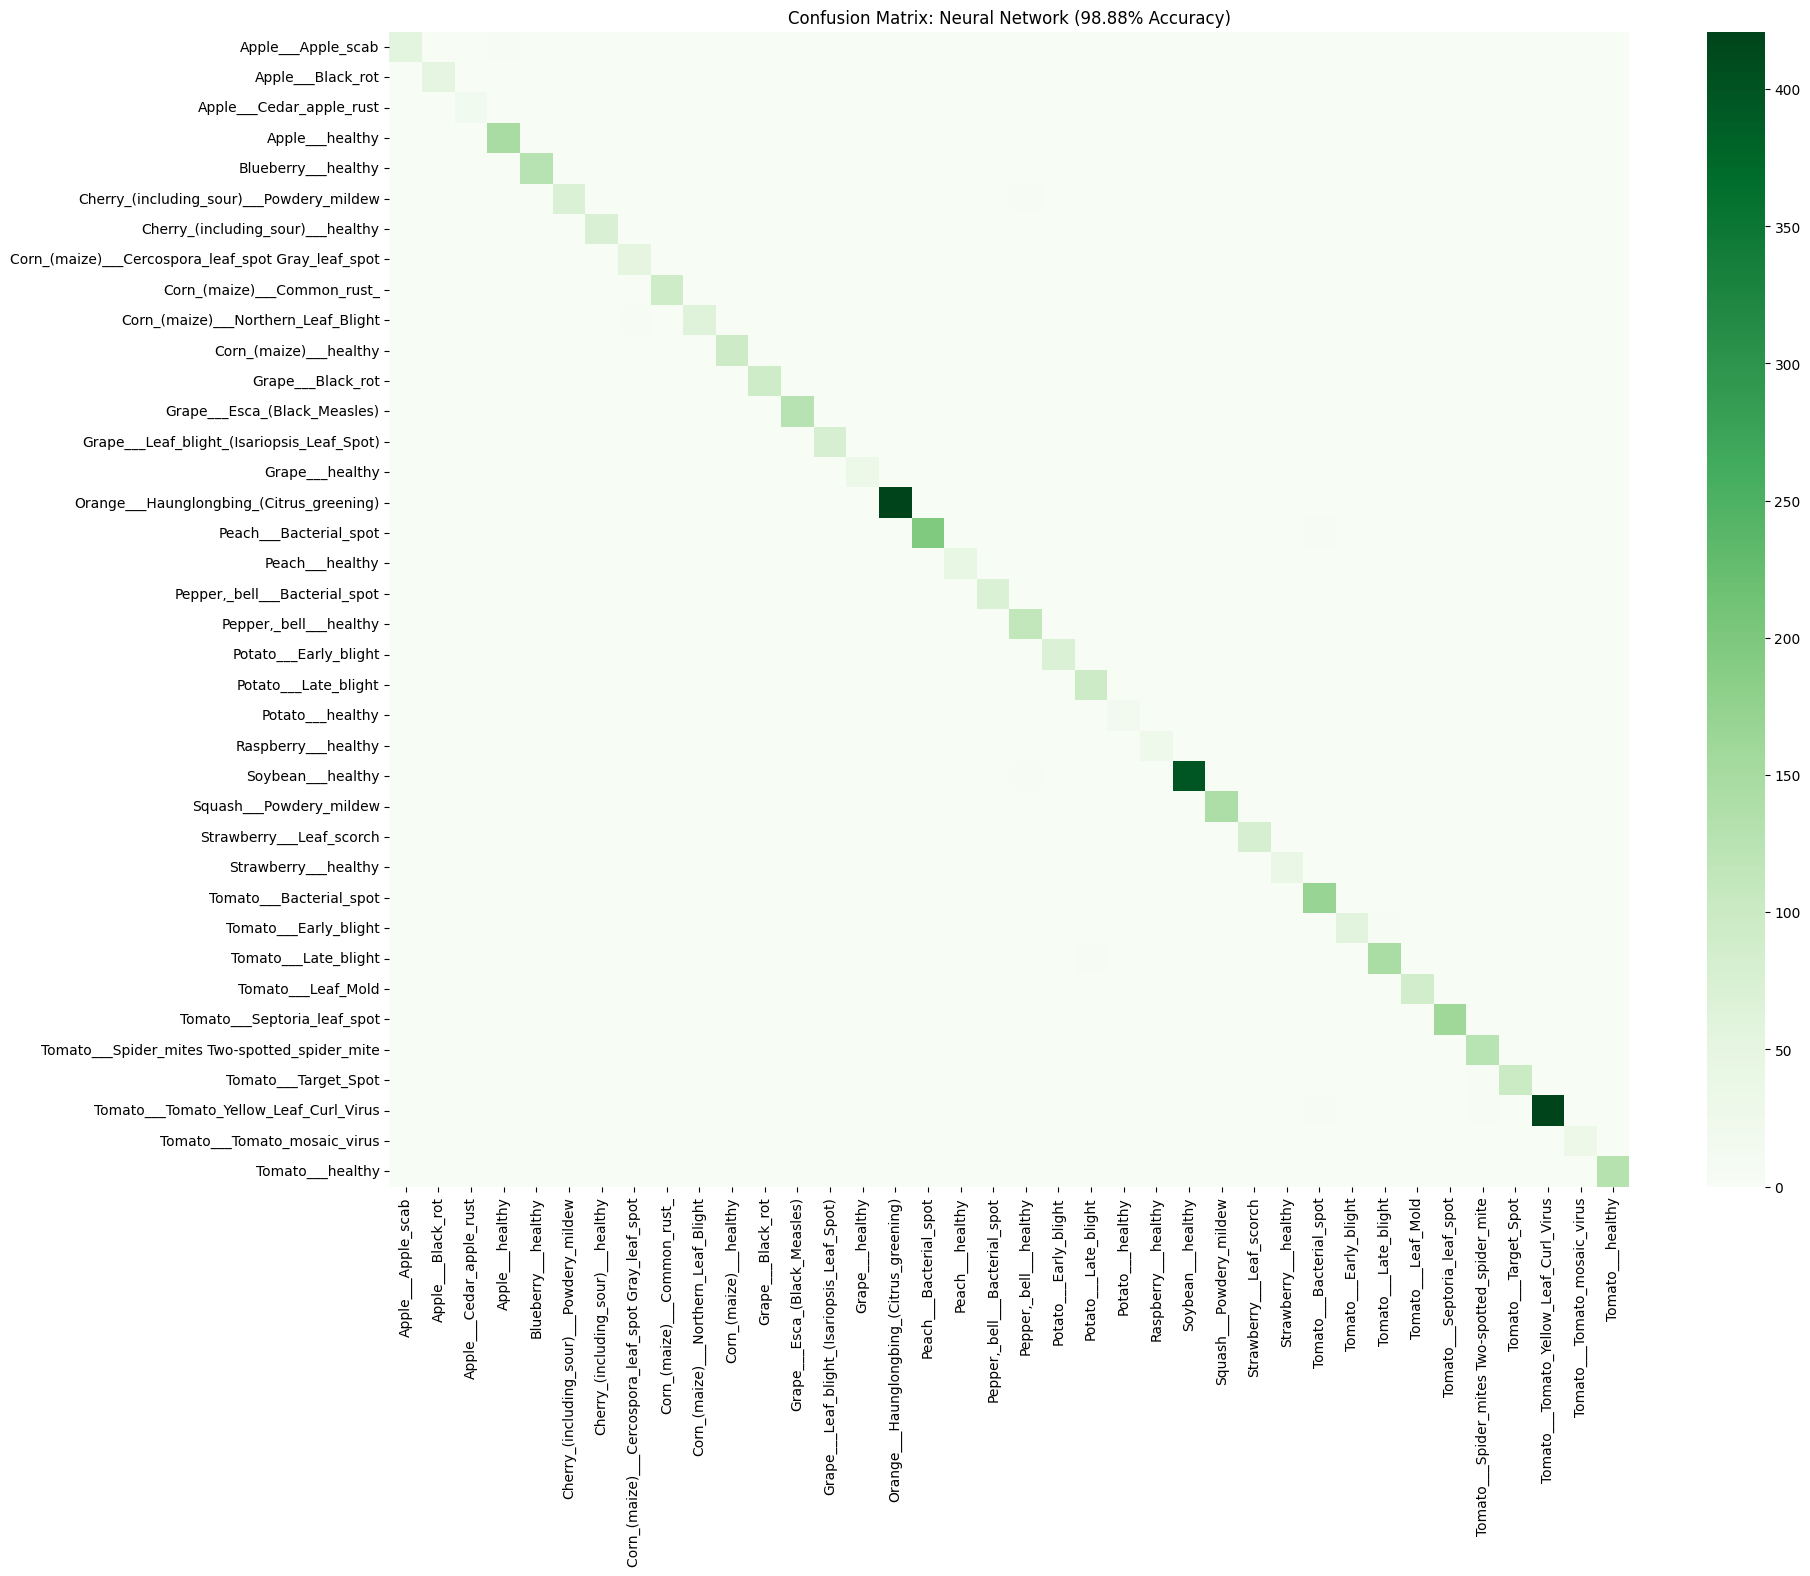

              precision    recall  f1-score   support

           0       1.00      0.92      0.96        60
           1       0.98      1.00      0.99        50
           2       0.94      0.94      0.94        18
           3       0.98      0.99      0.99       150
           4       1.00      1.00      1.00       128
           5       0.99      0.96      0.97        75
           6       1.00      1.00      1.00        74
           7       0.95      0.98      0.96        54
           8       1.00      1.00      1.00        92
           9       0.98      0.97      0.98        66
          10       0.99      1.00      0.99        97
          11       1.00      1.00      1.00        93
          12       1.00      1.00      1.00       128
          13       1.00      0.99      0.99        79
          14       0.97      1.00      0.99        33
          15       1.00      0.99      1.00       424
          16       0.99      0.97      0.98       203
          17       0.96    

In [22]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np


y_true, y_pred = [], []

for images, labels in test_ds:
    preds = reloaded_model.predict(images, verbose=0)

    y_pred.append(np.argmax(preds, axis=1))
    y_true.append(labels.numpy())

y_true = np.concatenate(y_true)
y_pred = np.concatenate(y_pred)

# Plotting confusion matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(20, 15))
sns.heatmap(cm, annot=False, cmap='Greens', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix: Neural Network (98.88% Accuracy)')
plt.show()

# Print classification report
print(classification_report(y_true, y_pred))


### **CNN Training History Visualization**

After training the Convolutional Neural Network, it's beneficial to visualize its training history, specifically the accuracy and loss curves for both the training and validation datasets across epochs. This helps in understanding the model's learning progress, detecting overfitting, and assessing its stability.

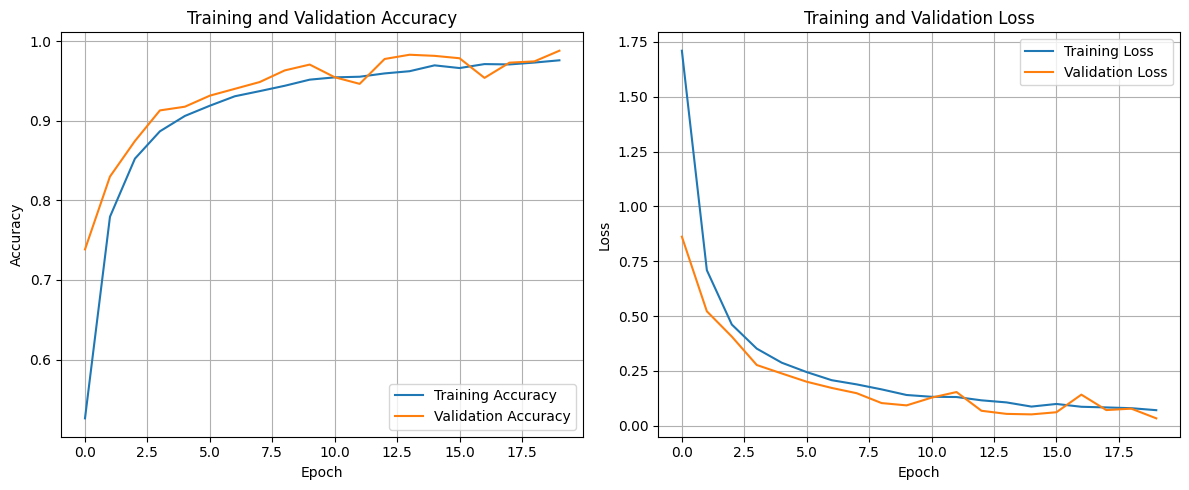

In [2]:
import matplotlib.pyplot as plt
import pandas as pd

history_df = reloaded_history

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history_df['accuracy'], label='Training Accuracy')
plt.plot(history_df['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Plot Training and Validation Loss
plt.subplot(1, 2, 2) # 1 row, 2 columns, second plot
plt.plot(history_df['loss'], label='Training Loss')
plt.plot(history_df['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

In [2]:
model.save('/content/drive/MyDrive/plant_disease_cnn_model.keras')
print("Model saved to Google Drive!")

Model saved to Google Drive!


In [3]:
import pandas as pd

history_df = pd.DataFrame(history.history)

# Save as a CSV file
history_df.to_csv('/content/drive/MyDrive/cnn_training_history.csv', index=False)
print("Training history saved to CSV!")

Training history saved to CSV!


### **Convolutional Neural Network (CNN) Performance**

The **CNN model** has achieved an outstanding **accuracy of 98.88%** on the test set. This significantly surpasses the performance of both the SVM (85.4%) and Random Forest (67.33%) models, demonstrating the superior capability of CNNs for image classification tasks.

- **Macro Average**: The **macro average** F1 score of **0.98** indicates exceptional performance across all classes, with high precision and recall values for nearly every plant disease category. This suggests the model is very effective at classifying both common and rarer diseases.

- **Weighted Average**: The **weighted average** F1 score of **0.99** further confirms the model's robust performance, even considering any class imbalances. The high weighted average indicates that the model is making accurate predictions for the majority of the dataset.

- **Class-specific Performance**:
    - The CNN model shows near-perfect or perfect performance for most classes, with many exhibiting 1.00 precision and recall, or very close to it (e.g., Blueberry___healthy, Corn_(maize)___Common_rust_, Grape___Black_rot, Orange___Haunglongbing_(Citrus_greening), and many others).
    - Even for classes where previous models struggled, like **Potato___healthy** (precision: 0.84, recall: 1.00), the CNN performs exceptionally well, indicating its ability to learn distinguishing features for challenging categories.
    - The minimal misclassifications, as seen in the confusion matrix, are distributed across a few classes, but the overall accuracy remains very high.

#### **Key Takeaways**:
1.  **Exceptional Accuracy**: The CNN model achieved a remarkable 98.88% accuracy, making it highly effective for plant disease detection in this dataset.
2.  **Strong Generalization**: High macro and weighted average F1 scores, along with excellent class-specific metrics, confirm the model's strong generalization ability across all 38 plant disease categories.
3.  **Superior to Traditional ML**: The CNN significantly outperforms both the SVM and Random Forest models, highlighting the power of deep learning architectures for complex visual pattern recognition.

This robust performance suggests that the trained CNN model is well-suited for deployment in practical applications for accurate plant disease diagnosis.

### **Model Comparison: SVM vs. Random Forest vs. CNN**

This project explored three different machine learning models for plant disease detection: Support Vector Machine (SVM), Random Forest, and Convolutional Neural Network (CNN). Each model was evaluated based on its accuracy, precision, recall, and F1-score across 38 different plant disease categories. Below is a comparative summary of their performance:

#### **1. Support Vector Machine (SVM)**
-   **Accuracy**: 85.4%
-   **Macro Average F1-score**: 0.81
-   **Weighted Average F1-score**: 0.85
-   **Key Insights**: The SVM model demonstrated good performance, providing a solid baseline for a multi-class image classification problem. It showed reasonable generalization across most classes, although some rarer classes exhibited lower recall.

#### **2. Random Forest Model**
-   **Accuracy**: 67.33%
-   **Macro Average F1-score**: 0.55
-   **Weighted Average F1-score**: 0.64
-   **Key Insights**: The Random Forest model performed significantly worse than the SVM, suggesting it was less suitable for this particular dataset and feature set (PCA-reduced image data). It struggled particularly with certain classes, even failing to predict some categories entirely, indicating poor generalization and the need for extensive tuning or different feature engineering.

#### **3. Convolutional Neural Network (CNN)**
-   **Accuracy**: 98.88%
-   **Macro Average F1-score**: 0.98
-   **Weighted Average F1-score**: 0.99
-   **Key Insights**: The CNN model achieved outstanding performance, vastly outperforming both SVM and Random Forest. Its high accuracy and F1-scores across almost all classes demonstrate its superior capability in learning complex visual features directly from image data. The CNN showed strong generalization and minimal misclassifications, making it the most effective model for this task.

#### **Overall Conclusion**

| Model          | Accuracy | Macro Avg F1 | Weighted Avg F1 |
|----------------|----------|--------------|-----------------|
| SVM            | 85.40%   | 0.81         | 0.85            |
| Random Forest  | 67.33%   | 0.55         | 0.64            |
| CNN            | 98.88%   | 0.98         | 0.99            |

The comparison clearly highlights the strength of **Convolutional Neural Networks** for image classification tasks like plant disease detection. While SVM provided a respectable performance, and Random Forest struggled, the CNN's ability to automatically extract hierarchical features from raw image pixels led to a dramatically higher accuracy and overall better performance. This makes the CNN the most suitable choice for deploying in a real-world plant disease diagnosis system based on this dataset.

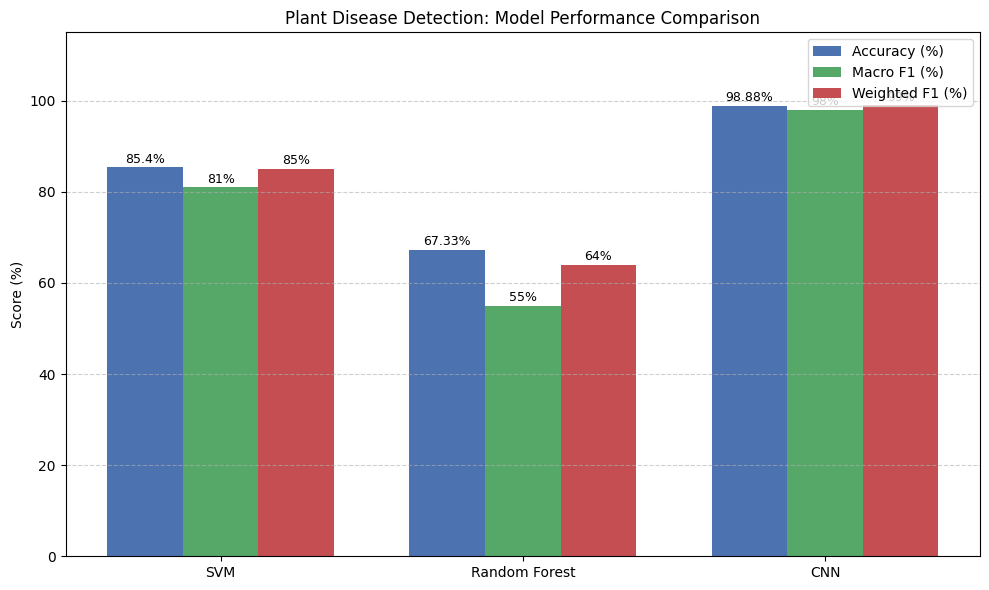

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Data extracted from your notebook's final summary
data = {
    'Model': ['SVM', 'Random Forest', 'CNN'],
    'Accuracy': [85.40, 67.33, 98.88],
    'Macro F1': [81.0, 55.0, 98.0],
    'Weighted F1': [85.0, 64.0, 99.0]
}

df = pd.DataFrame(data)

# Plotting
x = np.arange(len(df['Model']))
width = 0.25

plt.figure(figsize=(10, 6))
plt.bar(x - width, df['Accuracy'], width, label='Accuracy (%)', color='#4c72b0')
plt.bar(x, df['Macro F1'], width, label='Macro F1 (%)', color='#55a868')
plt.bar(x + width, df['Weighted F1'], width, label='Weighted F1 (%)', color='#c44e52')

# Styling
plt.ylabel('Score (%)')
plt.title('Plant Disease Detection: Model Performance Comparison')
plt.xticks(x, df['Model'])
plt.ylim(0, 115)
plt.legend(loc='upper right')
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Adding text labels on top of bars
for i in range(len(df)):
    plt.text(i - width, df['Accuracy'][i] + 1, f"{df['Accuracy'][i]}%", ha='center', fontsize=9)
    plt.text(i, df['Macro F1'][i] + 1, f"{int(df['Macro F1'][i])}%", ha='center', fontsize=9)
    plt.text(i + width, df['Weighted F1'][i] + 1, f"{int(df['Weighted F1'][i])}%", ha='center', fontsize=9)

plt.tight_layout()
plt.savefig('model_comparison_chart.png')
plt.show()